In [1]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
# import pylab as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
# import scipy.optimize as opt
# import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
# import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Reading the file
dataset = pd.read_csv("/kaggle/input/framingham-heart-study-dataset/framingham.csv")

In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.drop(columns='education', axis = 1, inplace = True)
dataset.rename(columns={'male':'gender'}, inplace=True)
print(dataset.shape)

(4240, 15)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [6]:
#REMOVING NULL VALUES ROWS
dataset.dropna(axis=0, inplace=True)
dataset.info()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB
(3751, 15)


In [7]:
#TRAIN TEST AND SPLIT FOR TRAINING

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

sc = StandardScaler()
x = sc.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 101)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (3000, 14) (3000,)
Test set: (751, 14) (751,)


In [8]:
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
y_pred = log_reg.predict(xtest)

In [9]:
# Evaluation and accuracy
print('Accuracy of the model is =', accuracy_score(ytest, y_pred))

Accuracy of the model is = 0.8615179760319573


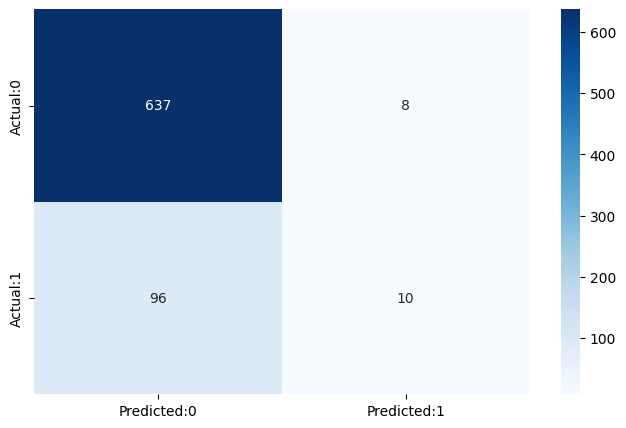

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       645
           1       0.56      0.09      0.16       106

    accuracy                           0.86       751
   macro avg       0.71      0.54      0.54       751
weighted avg       0.82      0.86      0.82       751



In [10]:
# Confusion matrix 

cm = confusion_matrix(ytest, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.show()
print('The details for confusion matrix is =')
print (classification_report(ytest, y_pred))

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)

In [12]:
# Evaluation and accuracy
print('Accuracy of the random forest model is =', accuracy_score(ytest, y_pred_rf))

Accuracy of the random forest model is = 0.8601864181091877
